In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('/content/gurgaon_properties_outlier_removed.csv')
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,house,independent,sector 105,0.74,7400.0,1000.0,Built Up area: 1000 (92.9 sq.m.),3,3,0,2.0,NaN,Undefined,NaN,1000.0,NaN,0,0,0,0,0,0,0,333.333333
1,flat,tulip ivory,sector 70,5.00,10417.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6,7,3+,0.0,NaN,Relatively New,NaN,NaN,4800.0,1,1,0,0,0,0,119,800.000000
2,flat,signature global park,sohna road,0.90,8036.0,1120.0,Super Built up area 1120(104.05 sq.m.),3,2,2,2.0,South,Under Construction,1120.0,NaN,NaN,0,0,0,0,0,0,144,373.333333
3,house,independent,sector 47,5.15,26615.0,1935.0,Plot area 215(179.77 sq.m.),3,9,3+,3.0,East,Relatively New,NaN,1935.0,NaN,0,0,1,0,0,1,75,645.000000
4,flat,central park flower valley aqua front towers,sector 33,1.70,9503.0,1789.0,Super Built up area 1789(166.2 sq.m.),3,3,3,12.0,NaN,Under Construction,1789.0,NaN,NaN,0,0,0,0,0,0,24,596.333333


In [83]:
df.shape

(3557, 24)

In [84]:
df.isna().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


# Built up area

### very strong correlation

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

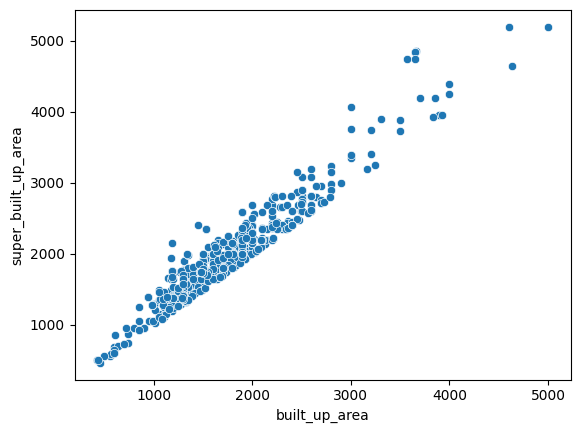

In [85]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

In [86]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())).sum()

np.int64(0)

In [87]:
all_present_df = df[((df['super_built_up_area'].notnull()) & (df['built_up_area'].notnull()) & (df['carpet_area'].notnull()))]
all_present_df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
5,flat,orchid petals,sector 49,2.35,11559.0,2033.0,Super Built up area 2033(188.87 sq.m.)Built Up...,3,3,3,15.0,West,Relatively New,2033.0,2030.0,1750.0,0,0,0,0,1,0,49,677.666667
17,flat,orris carnation residency,sector 85,0.72,4881.0,1475.0,Super Built up area 1475(137.03 sq.m.)Built Up...,3,3,2,9.0,West,Moderately Old,1475.0,1350.0,1250.0,0,0,0,0,1,0,49,491.666667
37,flat,indiabulls enigma,sector 110,3.40,10000.0,3400.0,Super Built up area 3400(315.87 sq.m.)Built Up...,4,5,3,10.0,South-West,Relatively New,3400.0,3000.0,2800.0,0,1,0,0,0,0,152,850.000000
39,flat,umang monsoon breeze,sector 78,1.25,5000.0,2500.0,Super Built up area 2350(218.32 sq.m.)Built Up...,4,4,3,2.0,East,Relatively New,2350.0,2300.0,2000.0,0,1,0,1,1,0,57,625.000000
49,flat,la vida by tata housing,sector 113,1.32,10345.0,1276.0,Super Built up area 1276(118.54 sq.m.)Built Up...,2,2,2,3.0,North-East,Relatively New,1276.0,1199.0,1099.0,0,0,0,0,0,0,49,638.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,flat,dlf the ultima,sector 81,2.30,10937.0,2103.0,Super Built up area 2103(195.38 sq.m.)Built Up...,3,3,3+,19.0,East,Relatively New,2103.0,1617.0,1257.0,1,1,0,1,1,2,49,701.000000
3477,flat,signature global park,sohna road,0.85,7863.0,1081.0,Super Built up area 1081(100.43 sq.m.)Built Up...,3,2,2,4.0,East,New Property,1081.0,1080.0,670.0,0,0,0,0,0,0,23,360.333333
3480,flat,ss the coralwood,sector 84,1.01,5771.0,1750.0,Super Built up area 1750(162.58 sq.m.)Built Up...,3,3,2,18.0,North-West,Relatively New,1750.0,1475.0,1350.0,0,0,0,0,0,0,40,583.333333
3524,flat,madhur jeevan apartments,sector 56,1.59,8595.0,1850.0,Super Built up area 2000(185.81 sq.m.)Built Up...,4,3,3+,3.0,North,Old Property,2000.0,1900.0,1850.0,0,0,0,0,1,1,33,462.500000


In [88]:
# How many times larger the super built-up area is compared to the built-up area.

super_to_built_up_ration = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()
super_to_built_up_ration

1.105263157894737

In [ ]:
# super_built_up_area = 1200 sq ft

# built_up_area = 1000 sq ft

# Ratio = 1200 / 1000 = 1.2

In [89]:
carpet_to_built_up_ration = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()
carpet_to_built_up_ration

0.9

### fill Nan of built_up_area by ration with other 2 area + apply mean

In [90]:
# super_built_up_area = 1.105 × built_up_area

super_carpet_df = df[(df['super_built_up_area'].notnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].notnull())]
super_carpet_df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
7,flat,bestech park view ananda,sector 81,1.15,6928.0,1660.0,Super Built up area 1660(154.22 sq.m.)Carpet a...,3,2,3+,6.0,South,Relatively New,1660.0,NaN,1282.00,1,0,0,0,0,1,104,553.333333
13,flat,godrej oasis,sector 88a,1.29,7799.0,1654.0,Super Built up area 1629(151.34 sq.m.)Carpet a...,3,3,3,5.0,NaN,New Property,1629.0,NaN,1628.00,1,0,0,0,1,0,65,551.333333
30,flat,satya the hermitage,sector 103,1.12,5625.0,1991.0,Super Built up area 1991(184.97 sq.m.)Carpet a...,3,4,3+,9.0,NaN,New Property,1991.0,NaN,1500.00,0,1,0,0,0,0,49,663.666667
36,flat,conscient elevate,sector 59,6.75,19882.0,3395.0,Super Built up area 3395(315.41 sq.m.)Carpet a...,4,4,2,10.0,NaN,New Property,3395.0,NaN,1855.00,0,1,0,0,0,0,31,848.750000
40,flat,adani m2k oyster grande,sector 102,2.40,9306.0,2579.0,Super Built up area 2579(239.6 sq.m.)Carpet ar...,3,4,3+,3.0,North-East,Relatively New,2579.0,NaN,2100.00,1,0,0,0,0,1,49,859.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3515,flat,godrej oasis,sector 88a,1.19,10162.0,1171.0,Super Built up area 1628(151.25 sq.m.)Carpet a...,2,2,3,15.0,South-East,Relatively New,1628.0,NaN,1171.00,1,0,0,1,0,1,174,585.500000
3519,flat,m3m sierra 68,sector 68,1.20,9002.0,1333.0,Super Built up area 1250(116.13 sq.m.)Carpet a...,2,2,3,1.0,North,Relatively New,1250.0,NaN,750.00,0,0,0,0,0,2,76,666.500000
3529,flat,mapsko mount ville,sector 79,1.55,8540.0,1815.0,Super Built up area 1815(168.62 sq.m.)Carpet a...,3,4,3,11.0,South-West,Relatively New,1815.0,NaN,1071.33,0,1,0,0,0,1,152,605.000000
3541,flat,shapoorji pallonji joyville gurugram,sector 102,0.97,10601.0,915.0,Super Built up area 915(85.01 sq.m.)Carpet are...,2,2,2,12.0,NaN,New Property,915.0,NaN,600.00,0,0,0,0,0,0,57,457.500000


In [91]:
super_carpet_df['built_up_area'].fillna(round(((super_carpet_df['super_built_up_area']/1.105) + (super_carpet_df['carpet_area']/0.9))/2),inplace=True)

In [92]:
super_carpet_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
7,flat,bestech park view ananda,sector 81,1.15,6928.0,1660.0,Super Built up area 1660(154.22 sq.m.)Carpet a...,3,2,3+,6.0,South,Relatively New,1660.0,1463.0,1282.0,1,0,0,0,0,1,104,553.333333
13,flat,godrej oasis,sector 88a,1.29,7799.0,1654.0,Super Built up area 1629(151.34 sq.m.)Carpet a...,3,3,3,5.0,NaN,New Property,1629.0,1642.0,1628.0,1,0,0,0,1,0,65,551.333333
30,flat,satya the hermitage,sector 103,1.12,5625.0,1991.0,Super Built up area 1991(184.97 sq.m.)Carpet a...,3,4,3+,9.0,NaN,New Property,1991.0,1734.0,1500.0,0,1,0,0,0,0,49,663.666667
36,flat,conscient elevate,sector 59,6.75,19882.0,3395.0,Super Built up area 3395(315.41 sq.m.)Carpet a...,4,4,2,10.0,NaN,New Property,3395.0,2567.0,1855.0,0,1,0,0,0,0,31,848.750000
40,flat,adani m2k oyster grande,sector 102,2.40,9306.0,2579.0,Super Built up area 2579(239.6 sq.m.)Carpet ar...,3,4,3+,3.0,North-East,Relatively New,2579.0,2334.0,2100.0,1,0,0,0,0,1,49,859.666667


In [93]:
df.update(super_carpet_df)

In [94]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [95]:
super_df = df[(df['super_built_up_area'].notnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

super_df['built_up_area'].fillna(round(super_df['super_built_up_area']/1.105),inplace=True)
df.update(super_df)

In [96]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [97]:
carpet_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].notnull())]

carpet_df['built_up_area'].fillna(round(carpet_df['carpet_area']/0.9),inplace=True)
df.update(carpet_df)

In [98]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


<Axes: xlabel='built_up_area', ylabel='price'>

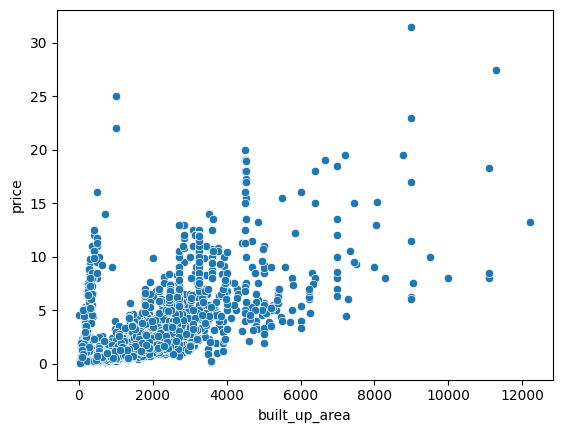

In [99]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

### there are some anamoly
### in area < 1500 then are some flat which price is 20 - 25 carore

In [100]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]
anamoly_df

,price,area,built_up_area
3,5.15,1935.0,1935.0
6,11.00,4125.0,500.0
12,11.00,2700.0,361.0
21,5.50,2700.0,300.0
26,4.70,2368.0,170.0
...,...,...,...
3514,3.25,1512.0,1512.0
3540,3.55,1449.0,1449.0
3549,5.50,1800.0,1800.0
3554,9.85,3323.0,418.0


### there are to option
* 1 is to -----> built_up_area = area -----> correct
* 2 is to ----> built_up_area = super_built_up_area / 1.105 ----> not good, only area have no missing values

In [101]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [102]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

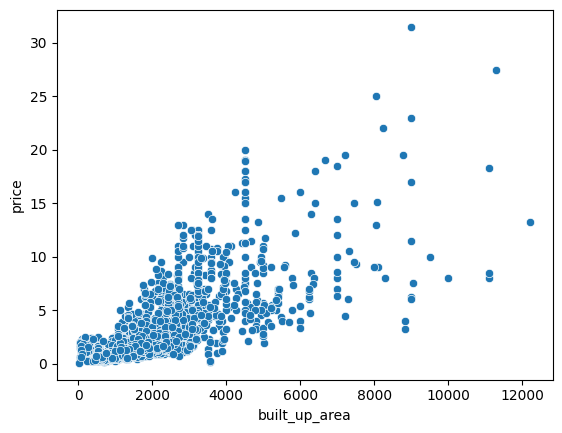

In [103]:
sns.scatterplot(x=df['built_up_area'], y=df['price'])

# Now drop those column which are not imp for our task, model building

In [104]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score', 'area_room_ratio'],
      dtype='object')

In [105]:
df.drop(columns=['area','areaWithType','super_built_up_area', 'carpet_area','area_room_ratio'],inplace=True)

In [106]:
df

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 105,0.74,7400.0,3,3,0,2.0,NaN,Undefined,1000.0,0,0,0,0,0,0,0
1,flat,tulip ivory,sector 70,5.00,10417.0,6,7,3+,0.0,NaN,Relatively New,5333.0,1,1,0,0,0,0,119
2,flat,signature global park,sohna road,0.90,8036.0,3,2,2,2.0,South,Under Construction,1014.0,0,0,0,0,0,0,144
3,house,independent,sector 47,5.15,26615.0,3,9,3+,3.0,East,Relatively New,1935.0,0,0,1,0,0,1,75
4,flat,central park flower valley aqua front towers,sector 33,1.70,9503.0,3,3,3,12.0,NaN,Under Construction,1619.0,0,0,0,0,0,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552,flat,ss,sector 85,1.19,7121.0,2,2,3,11.0,West,Relatively New,1670.0,0,0,0,0,0,0,49
3553,house,surendra homes dayaindependentd colony,sector 6,0.75,15625.0,4,4,2,1.0,NaN,Undefined,480.0,0,0,0,0,0,0,0
3554,house,independent,sector 43,9.85,29642.0,5,5,2,3.0,West,Old Property,3323.0,1,1,0,1,0,0,21
3555,flat,emaar mgf the palm drive,sector 66,3.98,18091.0,3,4,3+,2.0,South-East,Moderately Old,2200.0,0,1,0,0,0,1,123


In [107]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,17
facing,1012


# FloorNum

In [108]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
18,flat,experion heartsong,dwarka expressway,1.08,6150.0,3,3,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,0,0
216,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,Moderately Old,4635.0,0,0,0,0,0,0,0
389,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9
975,house,independent,sector 25,13.00,45710.0,6,8,3+,NaN,NaN,Relatively New,2844.0,1,1,1,1,0,2,0
1587,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,0,21
1590,house,independent,sector 26,4.60,12198.0,4,4,3+,NaN,NaN,Old Property,3771.0,0,0,0,0,0,0,28
1593,house,ansal sushant lok,sector 43,10.50,27911.0,4,4,2,NaN,North-East,Old Property,3762.0,0,1,0,0,0,0,59
1648,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,0,0
2021,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
2220,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0


In [109]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [110]:
df['floorNum'].fillna(2.0,inplace=True)

In [111]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
facing,1012


# facing

<Axes: ylabel='count'>

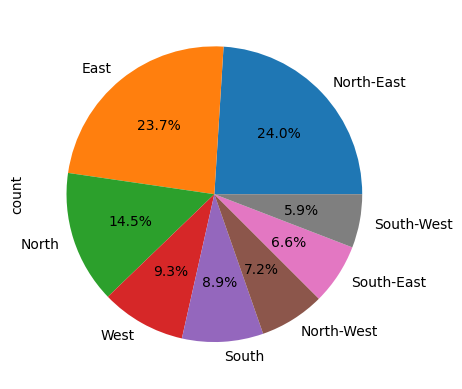

In [112]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### we simply drop this column

In [113]:
df.drop(columns=['facing'],inplace=True)

In [65]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0


In [114]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3348,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [115]:
df.drop(index=[3348],inplace=True)

In [116]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0


# one more columns has missing values ( agePossession )

In [117]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1605
New Property,558
Moderately Old,546
Old Property,293
Undefined,291
Under Construction,263


In [118]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 105,0.74,7400.0,3,3,0,2.0,Undefined,1000.0,0,0,0,0,0,0,0
15,flat,central park flower valley,sector 33,2.50,13270.0,3,3,2,1.0,Undefined,2093.0,0,0,0,0,0,0,66
20,house,independent,sector 4,1.10,11111.0,3,4,1,2.0,Undefined,990.0,0,0,0,0,0,0,0
25,house,independent,sector 3,3.50,9211.0,1,1,0,1.0,Undefined,3800.0,0,0,0,0,0,0,0
48,flat,assotech blith,sector 99,0.82,6007.0,2,2,3,0.0,Undefined,1365.0,0,0,0,0,0,0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,flat,satya the hermitage,sector 103,0.80,5517.0,2,2,0,10.0,Undefined,1450.0,0,0,0,0,0,0,61
3508,flat,aipl zen residences,sector 70a,1.40,11094.0,2,2,2,16.0,Undefined,1262.0,0,0,0,0,0,0,0
3523,flat,signature global infinity mall,sector 36,0.41,6269.0,2,2,3,3.0,Undefined,654.0,0,0,0,0,0,0,0
3550,house,independent,sector 105,1.30,11556.0,3,3,1,1.0,Undefined,1125.0,0,0,0,0,0,0,0


### fill these nan values by ... usi sector ke house ke mode value se (most frequent value)

In [125]:
# To fill or return a meaningful value for 'agePossession' if it's 'Undefined', by using the mode (most frequent value) from similar entries (same sector and property type).


# A function that takes a row (likely from a DataFrame) as input.
def compute_mode(row):

  # If the current row’s agePossession value is 'Undefined', we try to fill it using similar entries.
  if row['agePossession'] == 'Undefined':

    # This filters the main DataFrame df to get rows where:---------
        # sector matches the current row’s sector
        # property_type matches the current row’s property type
    mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()

    if not mode_value.empty:

      return mode_value.iloc[0]
    else:

      # If there are no matching rows, return NaN (missing value).
      return np.nan
  else:

    # If the original value is not 'Undefined', just return it as-is.
    return row['agePossession']


In [ ]:
'''
Example:

sector(56)    	property_type(Apartment)	    agePossession(Undefined)

'''

# Then compute_mode() looks into df to find:

# All rows with sector == 56 and property_type == 'Apartment'

# Gets the most frequent agePossession among them

# Fills that value

In [126]:
df['agePossession'] = df.apply(compute_mode,axis=1)

In [127]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1718
New Property,597
Moderately Old,585
Old Property,326
Under Construction,277
Undefined,53


In [128]:
def compute_mode2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [129]:
df['agePossession'] = df.apply(compute_mode2,axis=1)

In [130]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1727
New Property,598
Moderately Old,592
Old Property,329
Under Construction,277
Undefined,33


In [131]:
def compute_mode3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [132]:
df['agePossession'] = df.apply(compute_mode3,axis=1)

In [133]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1729
Moderately Old,623
New Property,598
Old Property,329
Under Construction,277


In [134]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0


In [135]:
df.to_csv('gurgaon_properties_missing_value_removed.csv',index=False)